## MNIST CNN

In [171]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [74]:
from fastai.vision import *
import mnist_reader
from PIL import Image

In [ ]:
import sys
sys.path.append(r"C:\Users\benja\Anaconda3\envs\fastai\Lib")

In [ ]:
data_path = Path(r"C:\Users\benja\Google Drive\ai\course-v3\data\fashion-mnist_real\data\fashion")

In [ ]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist(data_path, kind='train')
X_test, y_test = mnist_reader.load_mnist(data_path, kind='t10k')

In [126]:
save_path = Path(r"C:\Users\benja\.fastai\data\fashion_mnist_png\testing")


In [127]:
#convert the arrays to images and save them into the folders, just because it's easier to visualise the data that way
count = 0

for clas in y_test:
    
    img_resize = X_test[count].reshape(28,28)
    img = Image.fromarray(img_resize)

    fname = str(count)+".png"
    img.save(save_path/str(clas)/fname)
    
    count += 1

### Data

In [131]:
path = Path(r'C:/Users/benja/.fastai/data/fashion_mnist_png')

In [132]:
path.ls()

[WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/testing'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training')]

In [133]:
path

WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png')

In [134]:
il = ImageList.from_folder(path, convert_mode='L')

In [135]:
il.items[0]

WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/testing/0/1000.png')

In [136]:
defaults.cmap='binary'

In [137]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: C:\Users\benja\.fastai\data\fashion_mnist_png

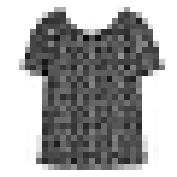

In [138]:
il[0].show()

In [139]:
sd = il.split_by_folder(train='training', valid='testing')

In [140]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: C:\Users\benja\.fastai\data\fashion_mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: C:\Users\benja\.fastai\data\fashion_mnist_png;

Test: None

In [141]:
(path/'training').ls()

[WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/0'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/1'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/2'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/3'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/4'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/5'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/6'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/7'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/8'),
 WindowsPath('C:/Users/benja/.fastai/data/fashion_mnist_png/training/9')]

In [142]:
ll = sd.label_from_folder()

In [143]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: C:\Users\benja\.fastai\data\fashion_mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: C:\Users\benja\.fastai\data\fashion_mnist_png;

Test: None

In [144]:
x,y = ll.train[0]

0torch.Size([1, 28, 28])


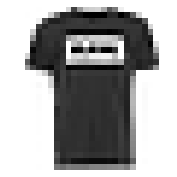

In [145]:
x.show()
print(y,x.shape)

In [146]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [147]:
ll = ll.transform(tfms)

In [148]:
bs = 128

In [149]:
# not using imagenet_stats because not using pretrained model
data = ll.databunch(bs=bs).normalize()

In [150]:
x,y = data.train_ds[0]

0


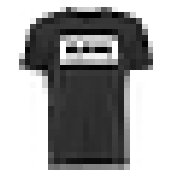

In [151]:
x.show()
print(y)

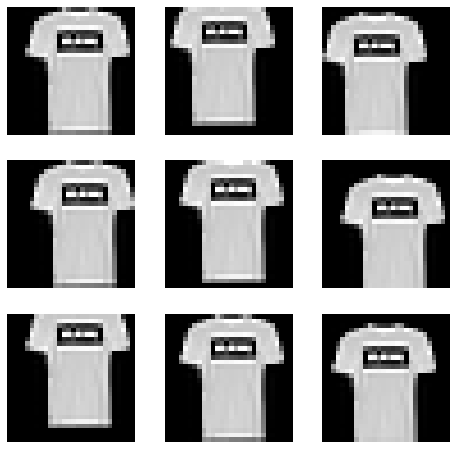

In [152]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [153]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

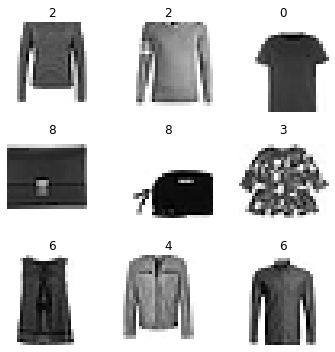

In [154]:
data.show_batch(rows=3, figsize=(5,5))

### Basic CNN with batchnorm

In [155]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [172]:
model = nn.Sequential(
    conv(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [173]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [158]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [174]:
xb = xb.cuda()

In [175]:
model(xb).shape

torch.Size([128, 10])

In [161]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


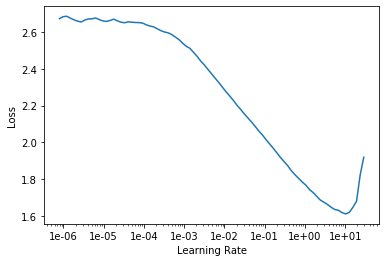

In [162]:
learn.recorder.plot()

In [176]:
learn.fit_one_cycle(1, max_lr=0.1) #put back to 3 after I join gpu

epoch,train_loss,valid_loss,accuracy,time
0,0.514663,0.463302,0.828300,01:40


### Refactor

In [167]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [168]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [169]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [170]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.624473,0.637484,0.753100,01:40
1,0.577668,0.579583,0.791800,01:39
2,0.529297,0.500798,0.821500,01:40
3,0.489163,0.492806,0.823000,01:49
4,0.462521,0.429201,0.846800,01:53
5,0.434378,0.483689,0.810900,01:53
6,0.405286,0.367971,0.861100,01:57
7,0.356349,0.339964,0.873100,01:55
8,0.330071,0.319343,0.881800,01:56
9,0.337840,0.310176,0.885400,01:35


### Resnet-ish

In [165]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [ ]:
help(res_block)

In [166]:
model = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

NameError: name 'conv2' is not defined

In [ ]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [ ]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [ ]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(12, max_lr=0.05)

In [ ]:
print(learn.summary())

## fin